In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf

# 1.讀入MNIST數據集

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 2.欣賞數據內容

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
n = 9487

In [8]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[n]

1

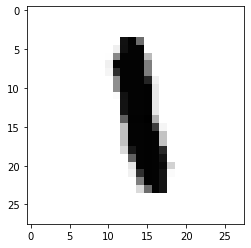

In [10]:
plt.imshow(x_train[n], cmap='Greys')

## 3.資料整理

In [11]:
np.array([3, 78, 95, 99])/100

array([0.03, 0.78, 0.95, 0.99])

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
28*28

784

In [15]:
x_train = x_train.reshape(60000, 784)

In [16]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
x_test = x_test.reshape(10000,784)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train = to_categorical(y_train, 10)

In [20]:
y_test = to_categorical(y_test, 10)

In [21]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 打造神經網路

In [22]:
from tensorflow.keras.models import Sequential     ## 函數學習機的名字
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [23]:
model = Sequential()

In [24]:
model.add(Dense(87,input_dim = 784, activation='relu'))

In [25]:
model.add(Dense(87, activation='relu'))

In [26]:
model.add(Dense(10, activation='softmax')) ##他是把每個強度化為0~1之間 最後加起來是1

## 4.組裝我們的神經網路

In [ ]:
model.compile(loss='mse', optimizer = SGD(lr=0.087), metrics =['accuracy'] ) ##lr = learning rate  ##SGD換題目順序避免背  ##accuracy會告訴你每次的正確率

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 87)                68295     
_________________________________________________________________
dense_1 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                880       
Total params: 76,831
Trainable params: 76,831
Non-trainable params: 0
_________________________________________________________________


In [29]:
784*87 + 87   ##神經元連結+每一個的偏值

68295

## 5.訓練

In [30]:
result = model.predict_classes(x_test)

In [31]:
model.fit(x_train, y_train, batch_size = 100, epochs = 20) 

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0835 - accuracy: 0.3580
Epoch 2/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0520 - accuracy: 0.7034
Epoch 3/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0290 - accuracy: 0.8419
Epoch 4/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0213 - accuracy: 0.8762
Epoch 5/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0183 - accuracy: 0.8892
Epoch 6/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0166 - accuracy: 0.8967
Epoch 7/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0155 - accuracy: 0.9021
Epoch 8/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0147 - accuracy: 0.9068
Epoch 9/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0141 - accuracy: 0.9102
Epoch 10/20
60

## 6.訓練成果

In [32]:
result = model.predict_classes(x_test)

In [33]:
result[9487]

2

神經網路預測是: 2


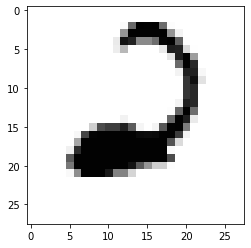

In [34]:
n = 9487

print("神經網路預測是:", result[n])
plt.imshow(x_test[n].reshape(28,28) , cmap = 'Greys')